In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
columns = ['sensor' + str(i+1) for i in range(23)]
columns = ['id', 'cycle', 'op1', 'op2', 'op3'] + columns
print(columns)

['id', 'cycle', 'op1', 'op2', 'op3', 'sensor1', 'sensor2', 'sensor3', 'sensor4', 'sensor5', 'sensor6', 'sensor7', 'sensor8', 'sensor9', 'sensor10', 'sensor11', 'sensor12', 'sensor13', 'sensor14', 'sensor15', 'sensor16', 'sensor17', 'sensor18', 'sensor19', 'sensor20', 'sensor21', 'sensor22', 'sensor23']


In [3]:
train = pd.read_csv('./NASA_Turbofan/CMaps/train_FD001.txt', sep=" ", names=columns)
test = pd.read_csv('./NASA_Turbofan/CMaps/test_FD001.txt', sep=" ", names=columns)
test_result = pd.read_csv('./NASA_Turbofan/CMaps/RUL_FD001.txt', sep=" ", header=None)

In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13096 entries, 0 to 13095
Data columns (total 28 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        13096 non-null  int64  
 1   cycle     13096 non-null  int64  
 2   op1       13096 non-null  float64
 3   op2       13096 non-null  float64
 4   op3       13096 non-null  float64
 5   sensor1   13096 non-null  float64
 6   sensor2   13096 non-null  float64
 7   sensor3   13096 non-null  float64
 8   sensor4   13096 non-null  float64
 9   sensor5   13096 non-null  float64
 10  sensor6   13096 non-null  float64
 11  sensor7   13096 non-null  float64
 12  sensor8   13096 non-null  float64
 13  sensor9   13096 non-null  float64
 14  sensor10  13096 non-null  float64
 15  sensor11  13096 non-null  float64
 16  sensor12  13096 non-null  float64
 17  sensor13  13096 non-null  float64
 18  sensor14  13096 non-null  float64
 19  sensor15  13096 non-null  float64
 20  sensor16  13096 non-null  fl

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 28 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        20631 non-null  int64  
 1   cycle     20631 non-null  int64  
 2   op1       20631 non-null  float64
 3   op2       20631 non-null  float64
 4   op3       20631 non-null  float64
 5   sensor1   20631 non-null  float64
 6   sensor2   20631 non-null  float64
 7   sensor3   20631 non-null  float64
 8   sensor4   20631 non-null  float64
 9   sensor5   20631 non-null  float64
 10  sensor6   20631 non-null  float64
 11  sensor7   20631 non-null  float64
 12  sensor8   20631 non-null  float64
 13  sensor9   20631 non-null  float64
 14  sensor10  20631 non-null  float64
 15  sensor11  20631 non-null  float64
 16  sensor12  20631 non-null  float64
 17  sensor13  20631 non-null  float64
 18  sensor14  20631 non-null  float64
 19  sensor15  20631 non-null  float64
 20  sensor16  20631 non-null  fl

In [6]:
# drop sensor22 and sensor23 measurements because no measurements are available
train.drop(['sensor22', 'sensor23'], axis=1, inplace=True)
test.drop(['sensor22', 'sensor23'], axis=1, inplace=True)

In [7]:
test_result

0   1
0   112 NaN
1    98 NaN
2    69 NaN
3    82 NaN
4    91 NaN
..  ...  ..
95  137 NaN
96   82 NaN
97   59 NaN
98  117 NaN
99   20 NaN

[100 rows x 2 columns]

In [8]:
test_result.columns = ['RUL_test', 'Null']
test_result.drop(['Null'], axis=1, inplace=True)

In [9]:
test_result

RUL_test
0        112
1         98
2         69
3         82
4         91
..       ...
95       137
96        82
97        59
98       117
99        20

[100 rows x 1 columns]

In [10]:
def make_RUL_test(df):
    grouped_by_unit = df.groupby(by='id')
    max_cycle = grouped_by_unit['cycle'].max()
    max_cycle = max_cycle.to_frame(name='max_cycle')
    result_frame = df.merge(max_cycle, left_on='id', right_index=True)
    result_frame['RUL'] = result_frame['max_cycle'] - result_frame['cycle']
    result_frame.drop(['max_cycle'], axis=1, inplace=True)
    result_frame = result_frame.merge(test_result, left_on='id', right_index=True)
    result_frame['RUL'] = result_frame['RUL'] + result_frame['RUL_test']
    result_frame.drop(['RUL_test'], axis=1, inplace=True)
    return result_frame

test = make_RUL_test(test)

In [11]:
def make_RUL(df):
    grouped_by_unit = df.groupby(by='id')
    max_cycle = grouped_by_unit['cycle'].max()
    max_cycle = max_cycle.to_frame(name='max_cycle')
    result_frame = df.merge(max_cycle, left_on='id', right_index=True)
    result_frame['RUL'] = result_frame['max_cycle'] - result_frame['cycle']
    result_frame.drop(['max_cycle'], axis=1, inplace=True)
    return result_frame

In [12]:
train = make_RUL(train)

In [13]:
train

id  cycle     op1     op2    op3  sensor1  sensor2  sensor3  sensor4  \
0        1      1 -0.0007 -0.0004  100.0   518.67   641.82  1589.70  1400.60   
1        1      2  0.0019 -0.0003  100.0   518.67   642.15  1591.82  1403.14   
2        1      3 -0.0043  0.0003  100.0   518.67   642.35  1587.99  1404.20   
3        1      4  0.0007  0.0000  100.0   518.67   642.35  1582.79  1401.87   
4        1      5 -0.0019 -0.0002  100.0   518.67   642.37  1582.85  1406.22   
...    ...    ...     ...     ...    ...      ...      ...      ...      ...   
20626  100    196 -0.0004 -0.0003  100.0   518.67   643.49  1597.98  1428.63   
20627  100    197 -0.0016 -0.0005  100.0   518.67   643.54  1604.50  1433.58   
20628  100    198  0.0004  0.0000  100.0   518.67   643.42  1602.46  1428.18   
20629  100    199 -0.0011  0.0003  100.0   518.67   643.23  1605.26  1426.53   
20630  100    200 -0.0032 -0.0005  100.0   518.67   643.85  1600.38  1432.14   

       sensor5  ...  sensor13  sensor14  sensor15  sensor16  sensor17  \
0        14.62  ...   2388.02   8138.62    8.4195      0.03       392   
1        14.62  ...   2388.07   8131.49    8.4318      0.03       392   
2        14.62  ...   2388.03   8133.23    8.4178      0.03       390   
3        14.62  ...   2388.08   8133.83    8.3682      0.03       392   
4        14.62  ...   2388.04   8133.80    8.4294      0.03       393   
...        ...  ...       ...       ...       ...       ...       ...   
20626    14.62  ...   2388.26   8137.60    8.4956      0.03       397   
20627    14.62  ...   2388.22   8136.50    8.5139      0.03       395   
20628    14.62  ...   2388.24   8141.05    8.5646      0.03       398   
20629    14.62  ...   2388.23   8139.29    8.5389      0.03       395   
20630    14.62  ...   2388.26   8137.33    8.5036      0.03       396   

       sensor18  sensor19  sensor20  sensor21  RUL  
0          2388     100.0     39.06   23.4190  191  
1          2388     100.0     39.00   23.4236  190  
2          2388     100.0     38.95   23.3442  189  
3          2388     100.0     38.88   23.3739  188  
4          2388     100.0     38.90   23.4044  187  
...         ...       ...       ...       ...  ...  
20626      2388     100.0     38.49   22.9735    4  
20627      2388     100.0     38.30   23.1594    3  
20628      2388     100.0     38.44   22.9333    2  
20629      2388     100.0     38.29   23.0640    1  
20630      2388     100.0     38.37   23.0522    0  

[20631 rows x 27 columns]

In [14]:
#trajs = train.id.unique()
#print(trajs)

In [15]:
def plot_measurement(sensor_key):
    plt.figure(figsize=(14,5))
    for i in train['id'].unique():
        if i % 1 == 0:
            plt.plot('RUL', sensor_key, data=train[train['id']==i])
            plt.xlim(250, 0)
            plt.xlabel('RUL')
            plt.ylabel(sensor_key)
    plt.show()

In [16]:
sensors = [x for x in train.columns if 'sensor' in x]
print(sensors)

['sensor1', 'sensor2', 'sensor3', 'sensor4', 'sensor5', 'sensor6', 'sensor7', 'sensor8', 'sensor9', 'sensor10', 'sensor11', 'sensor12', 'sensor13', 'sensor14', 'sensor15', 'sensor16', 'sensor17', 'sensor18', 'sensor19', 'sensor20', 'sensor21']


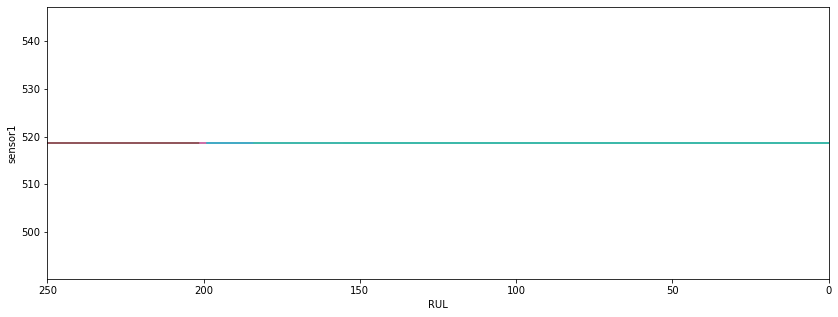

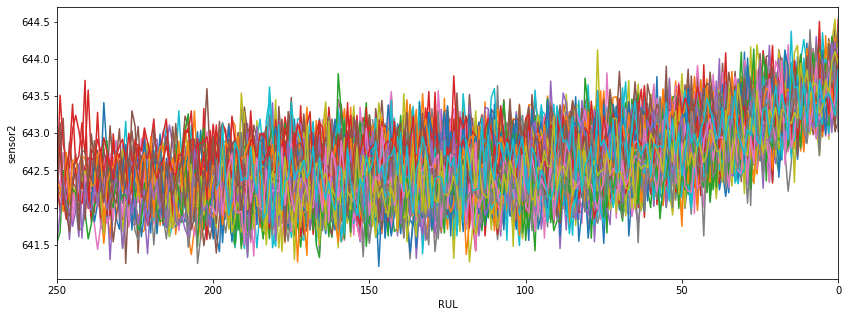

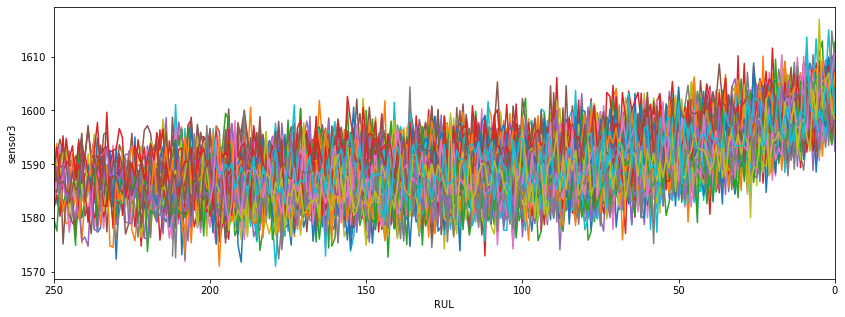

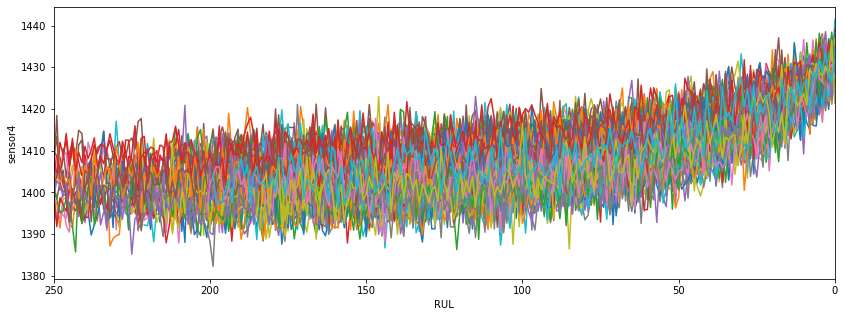

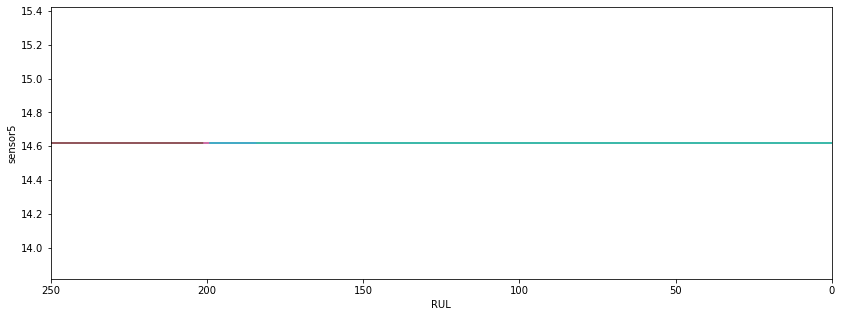

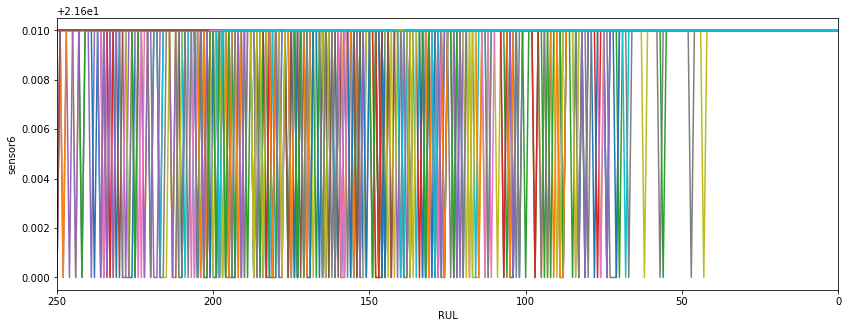

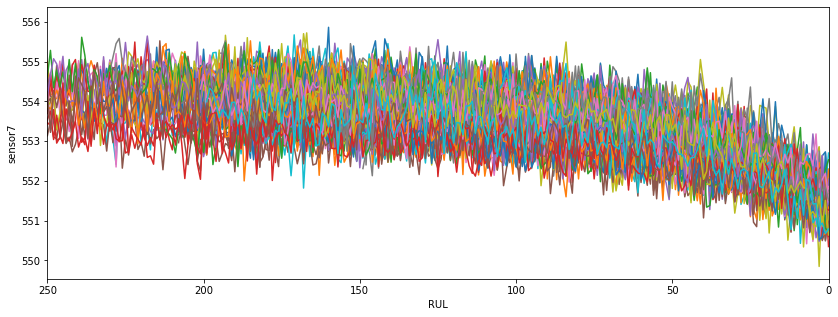

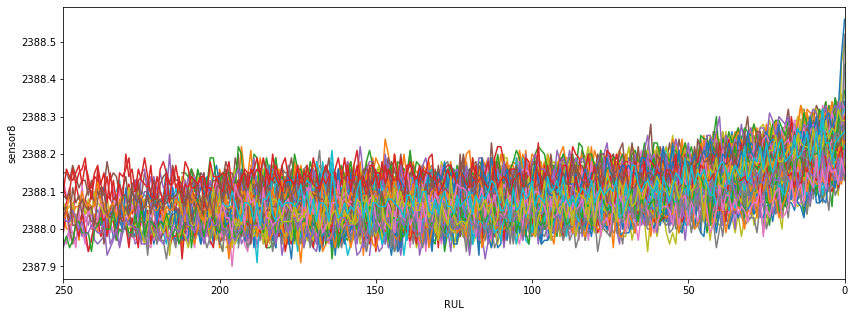

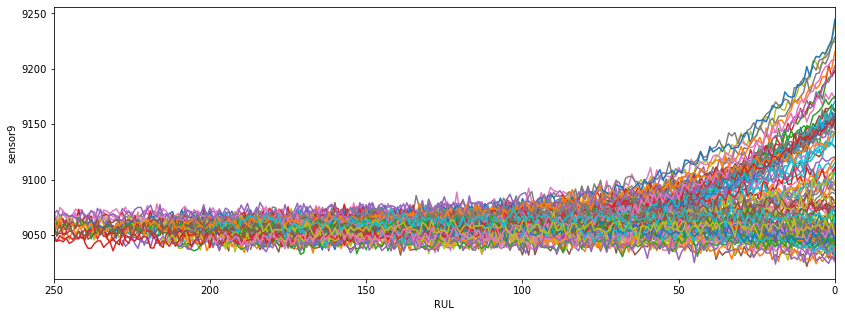

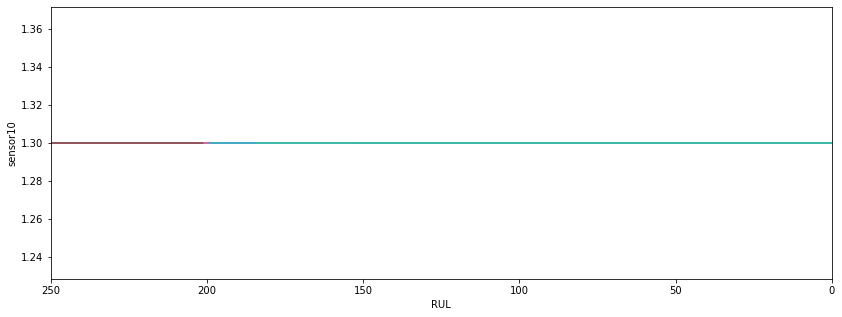

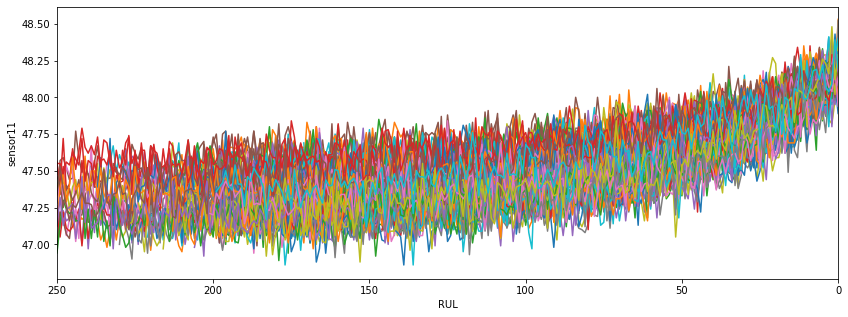

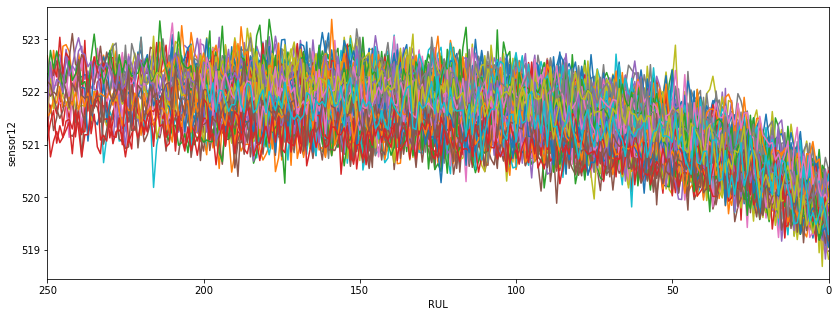

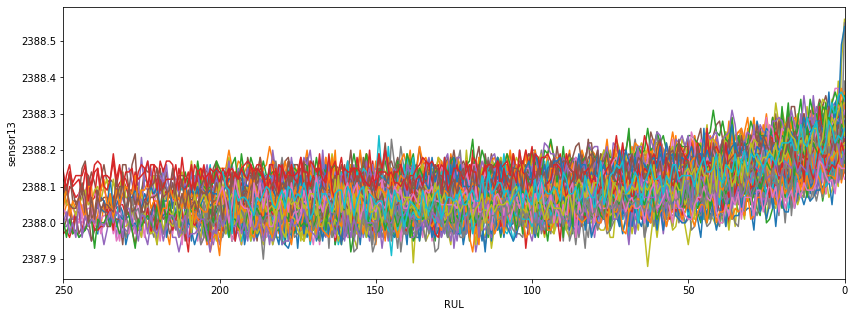

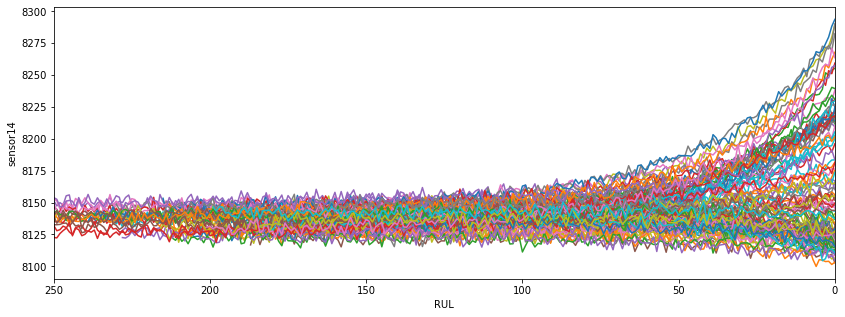

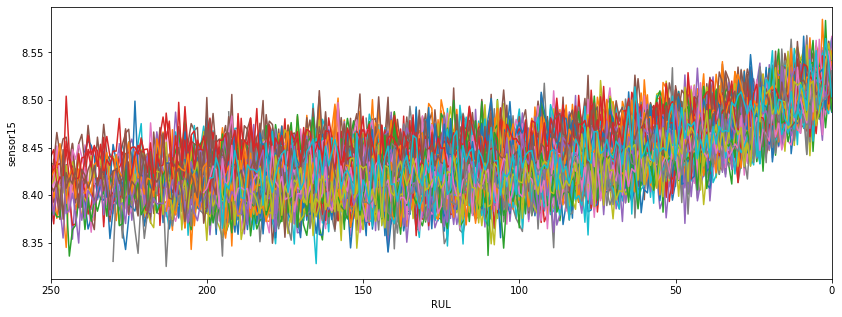

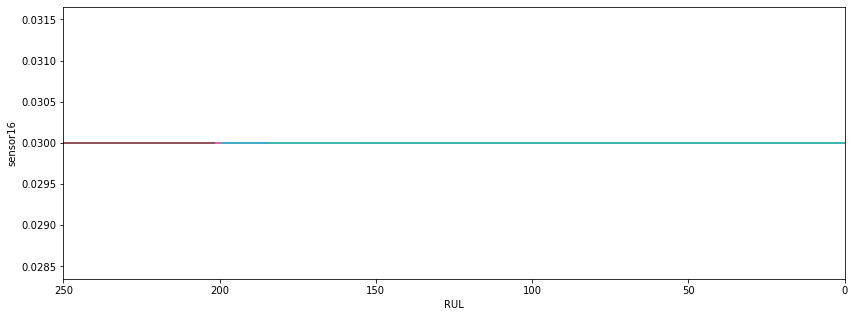

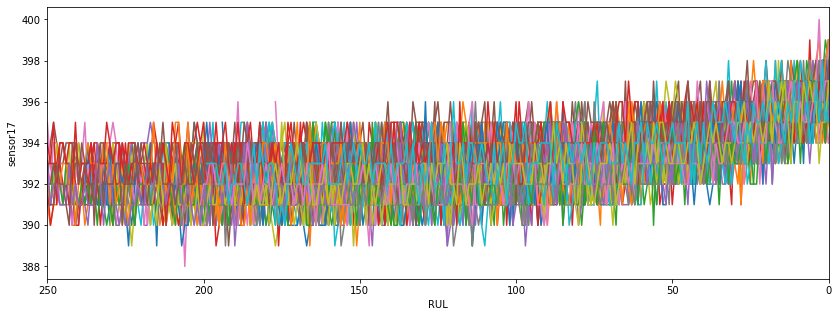

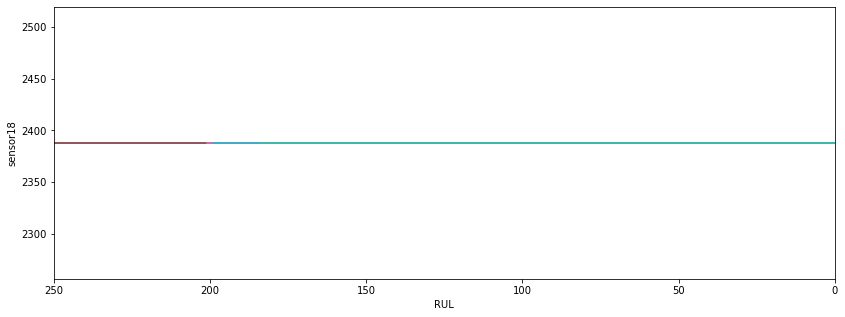

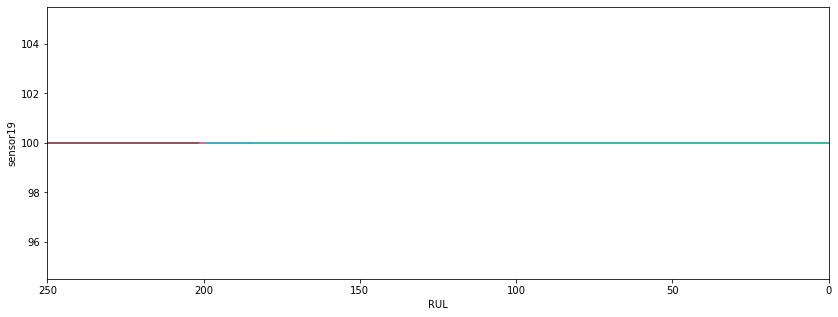

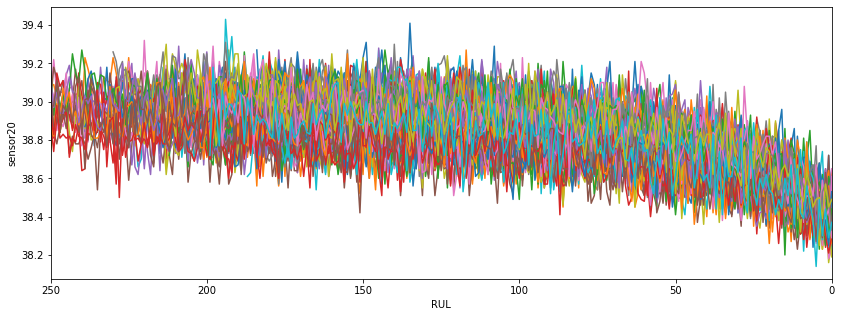

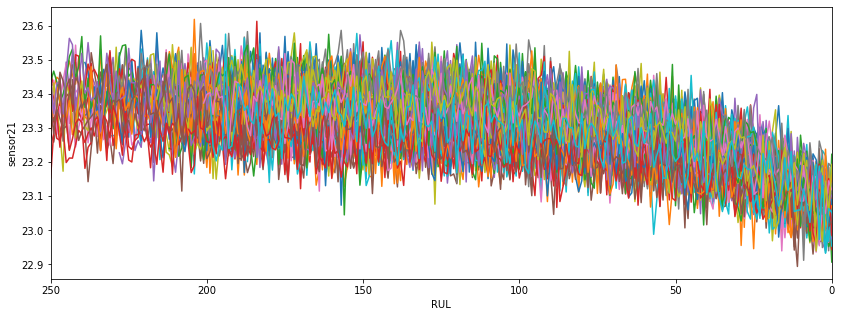

In [17]:
for sensor in sensors:
    plot_measurement(sensor)

In [18]:
# Drop sensor columns from dataframes that have no insights wether a turbofan crashes
no_insights_sensors = ['sensor1', 'sensor5', 'sensor6', 'sensor10', 'sensor16', 'sensor18', 'sensor19']

train.drop(no_insights_sensors, axis=1, inplace=True)
test.drop(no_insights_sensors, axis=1, inplace=True)

In [19]:
train_y = train['RUL']
train_X = train.drop(['RUL', 'id', 'cycle', 'op1', 'op2', 'op3'], axis=1)

In [20]:
test_y = test['RUL']
test_X = test.drop(['RUL', 'id', 'cycle', 'op1', 'op2', 'op3'], axis=1)

In [21]:
train_X.columns

Index(['sensor2', 'sensor3', 'sensor4', 'sensor7', 'sensor8', 'sensor9',
       'sensor11', 'sensor12', 'sensor13', 'sensor14', 'sensor15', 'sensor17',
       'sensor20', 'sensor21'],
      dtype='object')

In [22]:
test_X.columns

Index(['sensor2', 'sensor3', 'sensor4', 'sensor7', 'sensor8', 'sensor9',
       'sensor11', 'sensor12', 'sensor13', 'sensor14', 'sensor15', 'sensor17',
       'sensor20', 'sensor21'],
      dtype='object')

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [24]:
def evaluate(y_true, y_pred):
    MSE = mean_squared_error(y_true, y_pred)
    RMSE = np.sqrt(MSE)
    Var = r2_score(y_true, y_pred)
    MAE = mean_absolute_error(y_true, y_pred)
    
    print('MAE ', MAE)
    print('MSE ', MSE)
    print('RMSE ', RMSE)
    print('Variance ', Var)

In [25]:
model = LinearRegression()
model.fit(train_X, train_y)

pred_train_y = model.predict(train_X)
evaluate(train_y, pred_train_y)

print()
pred_test_y = model.predict(test_X)
evaluate(test_y, pred_test_y)

MAE  34.11528656498229
MSE  1995.2473404082345
RMSE  44.66819159545453
Variance  0.5794486527796716

MAE  49.97158229021368
MSE  3886.673186052198
RMSE  62.343188770323565
Variance  0.10163965273061382


In [26]:
test

id  cycle     op1     op2    op3  sensor2  sensor3  sensor4  sensor7  \
0       1      1  0.0023  0.0003  100.0   643.02  1585.29  1398.21   553.90   
1       1      2 -0.0027 -0.0003  100.0   641.71  1588.45  1395.42   554.85   
2       1      3  0.0003  0.0001  100.0   642.46  1586.94  1401.34   554.11   
3       1      4  0.0042  0.0000  100.0   642.44  1584.12  1406.42   554.07   
4       1      5  0.0014  0.0000  100.0   642.51  1587.19  1401.92   554.16   
...    ..    ...     ...     ...    ...      ...      ...      ...      ...   
12893  99     93 -0.0015  0.0003  100.0   642.24  1586.39  1401.46   554.62   
12894  99     94 -0.0016 -0.0004  100.0   642.48  1585.59  1397.55   554.77   
12895  99     95 -0.0028  0.0003  100.0   642.80  1581.63  1397.14   553.68   
12896  99     96 -0.0014 -0.0002  100.0   642.33  1583.39  1403.32   554.04   
12897  99     97  0.0047 -0.0000  100.0   642.00  1585.03  1397.98   554.75   

       sensor8  sensor9  sensor11  sensor12  sensor13  sensor14  sensor15  \
0      2388.04  9050.17     47.20    521.72   2388.03   8125.55    8.4052   
1      2388.01  9054.42     47.50    522.16   2388.06   8139.62    8.3803   
2      2388.05  9056.96     47.50    521.97   2388.03   8130.10    8.4441   
3      2388.03  9045.29     47.28    521.38   2388.05   8132.90    8.3917   
4      2388.01  9044.55     47.31    522.15   2388.03   8129.54    8.4031   
...        ...      ...       ...       ...       ...       ...       ...   
12893  2388.02  9062.38     47.12    522.25   2388.02   8160.62    8.4232   
12894  2388.02  9065.90     47.28    522.28   2388.01   8152.36    8.3898   
12895  2387.99  9072.62     47.16    521.43   2388.06   8148.20    8.3801   
12896  2387.98  9070.74     47.15    522.08   2388.01   8150.53    8.4022   
12897  2388.01  9067.16     47.26    521.82   2388.02   8150.38    8.4003   

       sensor17  sensor20  sensor21  RUL  
0           392     38.86   23.3735  128  
1           393     39.02   23.3916  127  
2           393     39.08   23.4166  126  
3           391     39.00   23.3737  125  
4           390     38.99   23.4130  124  
...         ...       ...       ...  ...  
12893       392     39.08   23.4853   24  
12894       391     38.90   23.3901   23  
12895       391     39.07   23.2856   22  
12896       390     38.97   23.4520   21  
12897       391     38.95   23.3595   20  

[12898 rows x 20 columns]